In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import dateutil
import pickle
import collections

%matplotlib inline

In [9]:
print('Pandas Version:', pd.__version__)
print('Numpy Version:', pd.__version__)

Pandas Version: 0.20.1
Numpy Version: 0.20.1


In [10]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 25)
pd.set_option('display.precision', 3)

## Read MTA turnstile data into a pandas DataFrame

We will combine all data for the month of May into one DataFrame

In [11]:
#Create dataframe of all data
frame = []
url_template = "http://web.mta.info/developers/data/nyct/turnstile/turnstile_%s.txt"
dates = ['160507', '160514', '160521', '160528']
for date in dates:
    url = url_template % date
    frame.append(pd.read_csv(url))


In [12]:
#concat all DataFrames into one
df_pickle = pd.concat(frame, ignore_index = True)
df_pickle.head(10)

#pickle the DataFrame for faster loading in the future
pickle.dump(df_pickle, open('save.p', 'wb'))
df = pickle.load(open('save.p', 'rb'))
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427


In [13]:
print(type(df))

<class 'pandas.core.frame.DataFrame'>


## Add new columns to analyze data

### Convert 'DATE' and 'TIME' from object to Timestamp

For example:
```
Timestamp('2015-01-17 03:00:00')
```

In [14]:
#Create date_time column that converts date and time in proper format
date_time = df['DATE'] + ' ' + df['TIME']
date_time = pd.to_datetime(date_time, format='%m/%d/%Y %H:%M:%S')

#Pickle to get date_time data faster
pickle.dump(date_time, open('date_time.p', 'wb'))
df['Date_Time'] = pickle.load(open('date_time.p', 'rb'))
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00


### Convert 'DATE' to datetime format and day of the week

Use this converted format to do some initial cleaning and adjusting dates

- Eliminate extra whitespaces
- Adjust date of times close to midnight

In [16]:
#Convert date and time to readable format
df_date = pd.to_datetime(df['DATE'], format='%m/%d/%Y')
df_hour = pd.to_datetime(df['TIME']).dt.hour

#Adjust date of times that are between 10pm and midnight
df_date[(df_hour==22)|(df_hour==23)] += datetime.timedelta(days=1)

#pickle the DataFrame for faster loading
pickle.dump(df_date, open('df_date.p', 'wb'))
df['Date_Parsed'] = pickle.load(open('df_date.p', 'rb'))

In [17]:
#Clean up file names to eliminate spaces
df.rename(columns=lambda x:x.strip(), inplace = True)

#Create columns for 'Day_of_Week' which converts Date_Parsed to Monday-Sunday
df['Day_of_Week'] = df['Date_Parsed'].dt.weekday_name
df.head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Date_Parsed,Day_of_Week
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00,2016-04-30,Saturday
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00,2016-04-30,Saturday
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00,2016-04-30,Saturday
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00,2016-04-30,Saturday
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00,2016-04-30,Saturday
5,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,20:00:00,REGULAR,5640802,1910254,2016-04-30 20:00:00,2016-04-30,Saturday
6,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,00:00:00,REGULAR,5640974,1910328,2016-05-01 00:00:00,2016-05-01,Sunday
7,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,04:00:00,REGULAR,5640996,1910333,2016-05-01 04:00:00,2016-05-01,Sunday
8,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,08:00:00,REGULAR,5641021,1910358,2016-05-01 08:00:00,2016-05-01,Sunday
9,A002,R051,02-00-00,59 ST,NQR456,BMT,05/01/2016,12:00:00,REGULAR,5641113,1910427,2016-05-01 12:00:00,2016-05-01,Sunday


### Create appropriate column labels for turnstiles and station names

- 'C/A' and 'SCP' represent unique turnstiles
- 'STATION' and 'LINENAME' represent each station stop
    - Some stations have more than one line

In [18]:
#Create 'Turnstile' column based on 'C/A' and 'SCP'
df['Turnstile'] = df['C/A'] + ' ' + df['SCP']
df.sort_values(by=['C/A', 'SCP', 'Date_Parsed'], ascending=[True, True, True])[['ENTRIES']].reset_index()

#Create 'Station_Line' column based on 'STATION' and 'LINENAME'
df['Station_Line'] = df['STATION'] + ' ' + df['LINENAME']

## Clean the data with useful information

### Count number of audits for each turnstile

In [19]:
#Get audits between 10pm to 2am
df_day = df[(df_hour==22)|(df_hour==23)|(df_hour==0)|(df_hour==1)]

#Count audits in each turnstile
turnstile_audits = df_day.groupby(['Turnstile'])['Date_Time'].nunique().to_frame().reset_index()
turnstile_audits = turnstile_audits.rename(columns={'Date_Time':'Audits'})

#Merge number of audits for each turnstile
df_day = pd.merge(df_day, turnstile_audits, on='Turnstile')

#Remove turnstiles that had extra audits at times other than midnight and 1am
max_audits = 42*len(dates)

df_day.drop(df_day.index[
    (df_day['TIME']!='01:00:00')&
    (df_day['TIME']!='00:00:00')&
    (df_day['Audits']>max_audits)],inplace=True)

In [20]:
#Check if this increased the number of audits
print(len(df[df['TIME']=='00:00:00']))
print(len(df_day))

66893
127358


These results show that there are significantly more data we can use because many audits were not performed at  ```midnight + 4N```. This implies that the time of data collection are not consistent among the turnstiles.

### Remove irregular audits and negative counts

In [21]:
pickle.dump(df_day, open('df_day.p', 'wb'))
df_day = pickle.load(open('df_day.p', 'rb'))

#Remove irregular audits
df_day.drop(df_day.index[df_day['DESC']!='REGULAR'], inplace=True)

#Remove days with negative counts or NaN
df_day.loc[:, 'New_Entries_Day'] = df_day.groupby(['Turnstile'])['ENTRIES'].diff().shift(-1)
df_day.loc[:, 'New_Exits_Day'] = df_day.groupby(['Turnstile'])['EXITS'].diff().shift(-1)
df_day.drop(df_day.index[df_day['New_Entries_Day']<=0], inplace=True)
df_day = df_day.dropna()

Refine df_day to include only relevant columns

In [22]:
df_day = df_day[['Turnstile', 'Station_Line', 'STATION', 'LINENAME', 'Date_Parsed', 'Day_of_Week', 'New_Entries_Day','New_Exits_Day']]
df_day.head(25)

,Turnstile,Station_Line,STATION,LINENAME,Date_Parsed,Day_of_Week,New_Entries_Day,New_Exits_Day
0,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-04-30,Saturday,1033.0,345.0
1,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-01,Sunday,729.0,249.0
2,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-02,Monday,1719.0,582.0
3,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-03,Tuesday,1718.0,640.0
4,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-04,Wednesday,1803.0,614.0
5,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-05,Thursday,1713.0,651.0
6,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-06,Friday,2776.0,849.0
8,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-08,Sunday,665.0,217.0
9,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-09,Monday,1702.0,546.0
10,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-10,Tuesday,2127.0,625.0


### Remove unrealistic amount of entries

- 10000 turns is about 7 turns per minute throughout the day, which is unrealistic during a regular workday

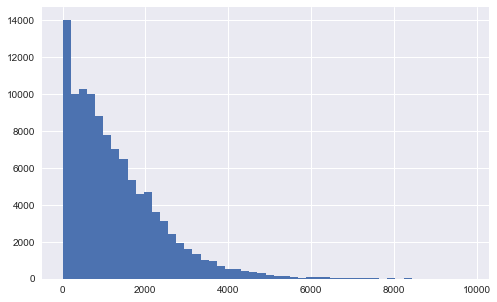

In [23]:
#Plot histogram showing the distribution of the entries after removing unrealistic entries
max_turns = 10000
hist_values = df_day[df_day['New_Entries_Day'] < max_turns]
hist_values['New_Entries_Day'].hist(bins=50, figsize=(8,5))

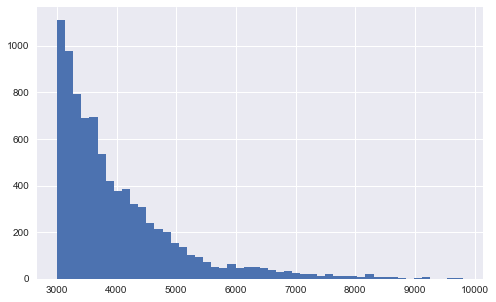

In [24]:
#Take a closer look at the distribution of entries starting at 3000 entries
hist_values = df_day[(df_day['New_Entries_Day'] < max_turns)&
                     (df_day['New_Entries_Day'] > 3000)]
hist_values['New_Entries_Day'].hist(bins=50, figsize=(8,5))

Find index with max entries for each turnstile

In [25]:
index_max = hist_values['New_Entries_Day'].idxmax()
df_day.loc[index_max-10:index_max+10]
df[(df['Turnstile']==df_day['Turnstile'][index_max])].head(10)

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Date_Parsed,Day_of_Week,Turnstile,Station_Line
76804,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,00:00:00,REGULAR,9327622,9364822,2016-04-30 00:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76805,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,04:00:00,REGULAR,9327685,9364841,2016-04-30 04:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76806,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,08:00:00,REGULAR,9327706,9364900,2016-04-30 08:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76807,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,12:00:00,REGULAR,9327824,9365096,2016-04-30 12:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76808,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,16:00:00,REGULAR,9328084,9365364,2016-04-30 16:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76809,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,04/30/2016,20:00:00,REGULAR,9328346,9365585,2016-04-30 20:00:00,2016-04-30,Saturday,N306 00-03-01,LEXINGTON AV/53 EM6
76810,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,05/01/2016,00:00:00,REGULAR,9328512,9365682,2016-05-01 00:00:00,2016-05-01,Sunday,N306 00-03-01,LEXINGTON AV/53 EM6
76811,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,05/01/2016,04:00:00,REGULAR,9328561,9365702,2016-05-01 04:00:00,2016-05-01,Sunday,N306 00-03-01,LEXINGTON AV/53 EM6
76812,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,05/01/2016,08:00:00,REGULAR,9328581,9365730,2016-05-01 08:00:00,2016-05-01,Sunday,N306 00-03-01,LEXINGTON AV/53 EM6
76813,N306,R017,00-03-01,LEXINGTON AV/53,EM6,IND,05/01/2016,12:00:00,REGULAR,9328674,9365892,2016-05-01 12:00:00,2016-05-01,Sunday,N306 00-03-01,LEXINGTON AV/53 EM6


In [26]:
#Filter out df_day so that the New_Entries_Day do not exceed max_turns
max_turns = 10000
df_day = df_day[(df_day['New_Entries_Day']<max_turns)]
df_day.head(10)

,Turnstile,Station_Line,STATION,LINENAME,Date_Parsed,Day_of_Week,New_Entries_Day,New_Exits_Day
0,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-04-30,Saturday,1033.0,345.0
1,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-01,Sunday,729.0,249.0
2,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-02,Monday,1719.0,582.0
3,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-03,Tuesday,1718.0,640.0
4,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-04,Wednesday,1803.0,614.0
5,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-05,Thursday,1713.0,651.0
6,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-06,Friday,2776.0,849.0
8,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-08,Sunday,665.0,217.0
9,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-09,Monday,1702.0,546.0
10,A002 02-00-00,59 ST NQR456,59 ST,NQR456,2016-05-10,Tuesday,2127.0,625.0


## To do next:

- Find the stations with the highest counts total
- Find day_of_week with highest counts for top stations
- Refine highest counts for specific hour of the day

## Find the station with the highest counts total

Start by finding counts for each individual turnstile

In [27]:
#Create New_Exits_Hour to New_Entries_Hour columns for count
df_4hour = df.copy()
df_4hour['New_Entries_Hour']= df_4hour.groupby(['Turnstile'])['ENTRIES'].diff().shift(-1)
df_4hour['New_Exits_Hour']= df_4hour.groupby(['Turnstile'])['EXITS'].diff().shift(-1)
df_4hour['Counts_Hour'] = df_4hour['New_Entries_Hour'] + df_4hour['New_Exits_Hour']

#Convert Day_of_Week to numbers
df_4hour['Day_Code'] = df_4hour['Date_Parsed'].dt.dayofweek
day_code = {
    0: 'Monday', 
    1: 'Tuesday', 
    2: 'Wednesday', 
    3: 'Thursday', 
    4: 'Friday', 
    5: 'Saturday', 
    6: 'Sunday'}

#Filter data to realistic Counts_Hour
df_4hour.drop(df_4hour.index[df_4hour['Counts_Hour']<0], inplace=True)
df_4hour.drop(df_4hour.index[df_4hour['Counts_Hour']>8000], inplace=True)
df_4hour.drop(df_4hour.index[df_4hour['DESC']!='REGULAR'], inplace=True)

#Filter data to remove audits where 'DESC' == 'REGULAR' but still has irregular audits
df_4hour.drop(df_4hour.index[
    (df_4hour['TIME']!='00:00:00')&
     (df_4hour['TIME']!='01:00:00')&
     (df_4hour['TIME']!='02:00:00')&
      (df_4hour['TIME']!='03:00:00')&
      (df_4hour['TIME']!='04:00:00')&
       (df_4hour['TIME']!='05:00:00')&
        (df_4hour['TIME']!='06:00:00')&
         (df_4hour['TIME']!='07:00:00')&
          (df_4hour['TIME']!='08:00:00')&
           (df_4hour['TIME']!='09:00:00')&
            (df_4hour['TIME']!='10:00:00')&
             (df_4hour['TIME']!='11:00:00')&
              (df_4hour['TIME']!='12:00:00')&
               (df_4hour['TIME']!='13:00:00')&
                (df_4hour['TIME']!='14:00:00')&
                 (df_4hour['TIME']!='15:00:00')&
                  (df_4hour['TIME']!='16:00:00')&
                   (df_4hour['TIME']!='17:00:00')&
                    (df_4hour['TIME']!='18:00:00')&
                     (df_4hour['TIME']!='19:00:00')&
                      (df_4hour['TIME']!='20:00:00')&
                       (df_4hour['TIME']!='21:00:00')&
                        (df_4hour['TIME']!='22:00:00')&
                         (df_4hour['TIME']!='23:00:00')], inplace=True)

df_4hour.head()


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,Date_Time,Date_Parsed,Day_of_Week,Turnstile,Station_Line,New_Entries_Hour,New_Exits_Hour,Counts_Hour,Day_Code
0,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,00:00:00,REGULAR,5639941,1909983,2016-04-30 00:00:00,2016-04-30,Saturday,A002 02-00-00,59 ST NQR456,50.0,10.0,60.0,5
1,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,04:00:00,REGULAR,5639991,1909993,2016-04-30 04:00:00,2016-04-30,Saturday,A002 02-00-00,59 ST NQR456,23.0,31.0,54.0,5
2,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,08:00:00,REGULAR,5640014,1910024,2016-04-30 08:00:00,2016-04-30,Saturday,A002 02-00-00,59 ST NQR456,144.0,110.0,254.0,5
3,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,12:00:00,REGULAR,5640158,1910134,2016-04-30 12:00:00,2016-04-30,Saturday,A002 02-00-00,59 ST NQR456,296.0,63.0,359.0,5
4,A002,R051,02-00-00,59 ST,NQR456,BMT,04/30/2016,16:00:00,REGULAR,5640454,1910197,2016-04-30 16:00:00,2016-04-30,Saturday,A002 02-00-00,59 ST NQR456,348.0,57.0,405.0,5


In [29]:
#Filter only good turnstiles from df_day to df_4hour
df_4hour = df_4hour[df_4hour['Turnstile'].isin(df_day['Turnstile'])]

In [30]:
#Find counts for each day and time for each turnstile
df_turnstile_time = df_4hour.groupby(['Station_Line','Turnstile','Day_Code','Day_of_Week','TIME'])['Counts_Hour'].sum().to_frame().reset_index()
df_turnstile_day = df_4hour.groupby(['Station_Line','Turnstile','Day_Code','Day_of_Week'])['Counts_Hour'].sum().to_frame().reset_index()
df_turnstile_day = df_turnstile_day.rename(columns={'Counts_Hour':'Counts_Day'})

In [31]:
#Find counts for each day and time for each station
df_station_time = df_4hour.groupby(['Station_Line','Day_Code','Day_of_Week','TIME'])['Counts_Hour'].sum().to_frame().reset_index()
df_station_day = df_4hour.groupby(['Station_Line', 'Day_Code','Day_of_Week'])['Counts_Hour'].sum().to_frame().reset_index()
df_station_day = df_station_day.rename(columns={'Counts_Hour':'Counts_Day'})
df_station_day = df_station_day.sort_values('Day_Code', ascending=True)

In [116]:
#Find counts for each station, sorted from highest to lowest
df_station_total = df_4hour.groupby(['Station_Line'])['Counts_Hour'].sum().to_frame().reset_index()
df_station_total = df_station_total.rename(columns={'Counts_Hour':'Counts'})
df_station_total = df_station_total.sort_values('Counts', ascending=False).reset_index()

In [33]:
#Refine the top 20 stations with highest counts
df_station_total_ranked =df_station_total_ranked.head(20)
df_station_total_ranked

,index,Station_Line,Counts
0,302,GRD CNTRL-42 ST 4567S,6.433e+06
1,86,34 ST-HERALD SQ BDFMNQR,5.526e+06
2,424,TIMES SQ-42 ST 1237ACENQRS,3.872e+06
3,90,34 ST-PENN STA ACE,3.489e+06
4,28,14 ST-UNION SQ LNQR456,3.448e+06
5,99,42 ST-PORT AUTH ACENQRS1237,3.242e+06
6,152,86 ST 456,3.039e+06
7,103,47-50 STS ROCK BDFM,2.772e+06
8,279,FLUSHING-MAIN 7,2.762e+06
9,120,59 ST COLUMBUS ABCD1,2.704e+06


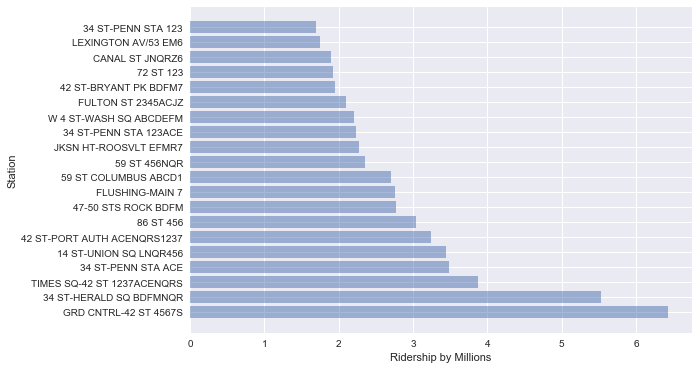

In [81]:
#Plot a bar graph of top 20 stations and the total counts
fig, ax = plt.subplots(1,1)
Default_Size = fig.get_size_inches()
fig.set_size_inches(Default_Size[0]*1.5, Default_Size[1]*1.5)
y_values = df_station_total_ranked['Station_Line']
x_values = df_station_total_ranked['Counts']/1000000
y_position = np.arange(len(x_values))
plt.barh(y_position, x_values, alpha = 0.5)
plt.yticks(y_position, y_values);
plt.ylabel('Station')
plt.xlabel('Ridership by Millions')


### Great! We found the top 20 stations! Now, let's find which specific day of week is best for these stations.

### Find the day of week with highest counts for each top station

In [35]:
df_station_day.head(10)

,Station_Line,Day_Code,Day_of_Week,Counts_Day
0,1 AV L,0,Monday,163923.0
427,207 ST 1,0,Monday,38830.0
3087,WHITEHALL S-FRY R1,0,Monday,130233.0
2870,SIMPSON ST 25,0,Monday,47548.0
1022,8 ST-NYU NR,0,Monday,113433.0
1946,FLUSHING AV JM,0,Monday,51098.0
420,20 AV N,0,Monday,6554.0
1029,80 ST A,0,Monday,25207.0
2425,LORIMER ST LG,0,Monday,30290.0
1036,81 ST-MUSEUM BC,0,Monday,95473.0


Find all station's top Counts_Day and corresponding Day_of_Week

In [36]:
#Keep only top Counts_Day for each Station_Line
df_station_day_filter = df_station_day.sort_values(['Station_Line', 'Counts_Day'], ascending=False)
df_station_day_filter = df_station_day_filter.drop_duplicates(subset='Station_Line',keep='first')
df_station_day_filter.head(10)

,Station_Line,Day_Code,Day_of_Week,Counts_Day
3146,ZEREGA AV 6,3,Thursday,21454.0
3139,YORK ST F,3,Thursday,73679.0
3132,WORLD TRADE CTR ACE23,3,Thursday,100037.0
3122,WOODLAWN 4,0,Monday,41750.0
3119,WOODHAVEN BLVD MR,4,Friday,144808.0
3111,WOODHAVEN BLVD JZ,3,Thursday,30391.0
3102,WINTHROP ST 25,1,Tuesday,37501.0
3096,WHITLOCK AV 6,2,Wednesday,15615.0
3087,WHITEHALL S-FRY R1,0,Monday,130233.0
3081,WESTCHESTER SQ 6,1,Tuesday,51814.0


Filter to only top 20 stations

In [59]:
df_top_station_day = df_station_day_filter[df_station_day_filter['Station_Line'].isin(df_station_total_ranked['Station_Line'])].sort_values('Counts_Day', ascending=False)
df_top_station_day

,Station_Line,Day_Code,Day_of_Week,Counts_Day
2115,GRD CNTRL-42 ST 4567S,1,Tuesday,1.184e+06
604,34 ST-HERALD SQ BDFMNQR,2,Wednesday,9.588e+05
2963,TIMES SQ-42 ST 1237ACENQRS,2,Wednesday,6.453e+05
630,34 ST-PENN STA ACE,0,Monday,6.165e+05
199,14 ST-UNION SQ LNQR456,3,Thursday,5.730e+05
696,42 ST-PORT AUTH ACENQRS1237,3,Thursday,5.496e+05
1066,86 ST 456,2,Wednesday,5.085e+05
722,47-50 STS ROCK BDFM,1,Tuesday,5.083e+05
843,59 ST COLUMBUS ABCD1,3,Thursday,4.629e+05
1955,FLUSHING-MAIN 7,2,Wednesday,4.581e+05


These are the best days and respective counts for these stations! 

## Create heat maps to visualize this better

First, create pivot table data for all stations

In [38]:
#Reorder Day_of_Week columns
column_order = ['Monday', 'Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

#Create pivot table for all Station_Line vs Day_of_Week
df_station_day_pivot = df_station_day.pivot_table(index='Station_Line', 
                           values='Counts_Day', 
                           columns='Day_of_Week',
                          aggfunc=np.max)
df_station_day_pivot = df_station_day_pivot.reindex_axis(column_order, axis=1)
df_station_day_pivot

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Station_Line,,,,,,,
1 AV L,163923.0,173720.0,179129.0,182941.0,181187.0,149648.0,111097.0
103 ST 1,78566.0,82643.0,70582.0,63334.0,60998.0,58125.0,49441.0
103 ST 6,69449.0,74778.0,76600.0,73920.0,73945.0,38220.0,29364.0
103 ST BC,34817.0,36139.0,36889.0,36599.0,33440.0,20662.0,17005.0
103 ST-CORONA 7,139713.0,116815.0,140639.0,142813.0,138604.0,106032.0,83517.0
104 ST A,10036.0,10252.0,10220.0,10147.0,8993.0,4267.0,3027.0
104 ST JZ,14949.0,15378.0,15590.0,15353.0,14333.0,8937.0,6500.0
110 ST 6,101218.0,104127.0,110600.0,109704.0,104930.0,64396.0,48644.0
111 ST 7,75389.0,76583.0,77595.0,76802.0,73765.0,63825.0,48521.0


Now, create pivot table of counts for just the top stations

In [39]:
#Refine pivot table to top 20
df_top_station_day_pivot = df_station_day[df_station_day['Station_Line'].isin(df_station_total_ranked['Station_Line'])]
df_top_station_day_pivot = df_top_station_day_pivot.pivot_table(index='Station_Line',
                                   values='Counts_Day',
                                   columns='Day_of_Week',
                                   aggfunc=np.max)
df_top_station_day_pivot = df_top_station_day_pivot.reindex_axis(column_order, axis=1)

In [40]:
#Refine data to top 10 recommended based on criteria, this can be obtained through the later sections
final_stations = pd.DataFrame(['GRD CNTRL-42 ST 4567S', '34 ST-PENN STA ACE', '86 ST 456', '47-50 STS ROCK BDFM',
                 '59 ST COLUMBUS ABCD1', 'W 4 ST-WASH SQ ABCDEFM', 'LEXINGTON AV/53 EM6',
                 '42 ST-BRYANT PK BDFM7', '96 ST 123', '34 ST-PENN STA 123'], columns=['Station_Line'])
df_station_day_pivot_refined = df_station_day.copy()
df_station_day_pivot_refined = df_station_day[df_station_day['Station_Line'].isin(final_stations['Station_Line'])]
df_station_day_pivot_refined = df_station_day_pivot_refined.pivot_table(index='Station_Line',
                                                                       values='Counts_Day',
                                                                       columns='Day_of_Week',
                                                                       aggfunc=np.max)
df_station_day_pivot_refined = df_station_day_pivot_refined.reindex_axis(column_order, axis=1)
df_station_day_pivot_refined

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
Station_Line,,,,,,,
34 ST-PENN STA 123,2.808e+05,2.911e+05,2.907e+05,2.957e+05,2.801e+05,146784.0,112821.0
34 ST-PENN STA ACE,6.165e+05,6.000e+05,5.227e+05,5.544e+05,6.011e+05,327592.0,267121.0
42 ST-BRYANT PK BDFM7,3.285e+05,3.433e+05,3.612e+05,3.588e+05,3.240e+05,140351.0,98173.0
47-50 STS ROCK BDFM,4.730e+05,5.083e+05,4.942e+05,5.034e+05,4.993e+05,166528.0,127261.0
59 ST COLUMBUS ABCD1,4.380e+05,4.488e+05,4.614e+05,4.629e+05,3.988e+05,277476.0,217129.0
86 ST 456,4.732e+05,4.715e+05,5.085e+05,4.784e+05,4.954e+05,346681.0,265107.0
96 ST 123,2.300e+05,2.496e+05,3.023e+05,2.660e+05,2.696e+05,163765.0,138684.0
GRD CNTRL-42 ST 4567S,1.078e+06,1.184e+06,1.182e+06,1.145e+06,1.086e+06,424249.0,334260.0
LEXINGTON AV/53 EM6,3.368e+05,3.332e+05,3.063e+05,3.065e+05,3.143e+05,90812.0,63422.0


Let's make the actual heatmap!

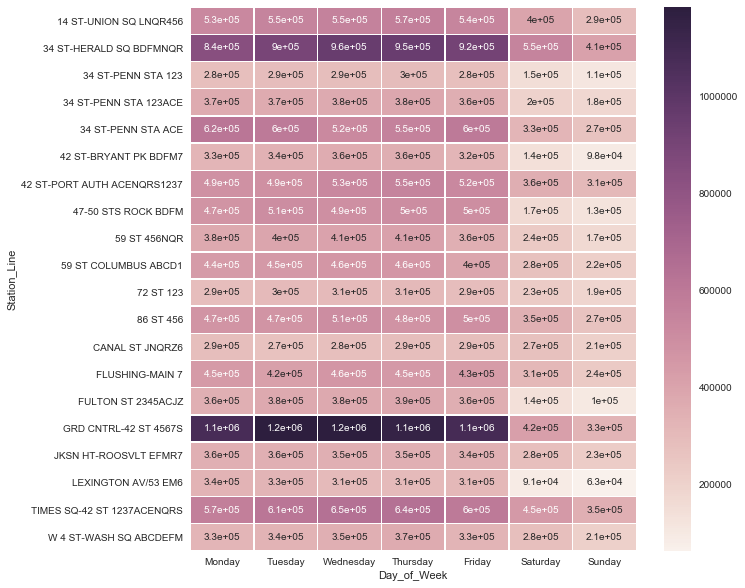

In [42]:
#Create heatmap for top 20 stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_top_station_day_pivot, annot=True , linewidth=0.5, ax=ax)

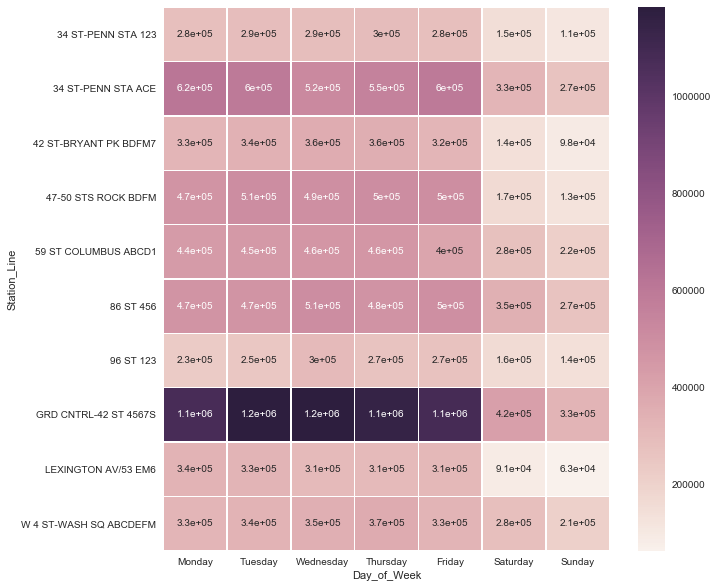

In [43]:
#Create heatmap for top 10 recommended
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_station_day_pivot_refined, annot=True , linewidth=0.5, ax=ax)

### Check specific time for the top days are ideal

In [44]:
#Find total hours for each Day_of_Week and TIME
df_4hour_station = df_4hour.groupby(['Station_Line','Day_Code','Day_of_Week','TIME'])['Counts_Hour'].sum().reset_index()

#Filter top time of each day for each station
df_4hour_station = df_4hour_station.sort_values(['Station_Line','Day_Code','Day_of_Week','Counts_Hour'], ascending = False)

#Add column combining Station_Line and Day_of_Week
df_4hour_station['Station_Day'] = df_4hour_station['Station_Line'] + ' ' + df_4hour_station['Day_of_Week']

In [45]:
#Filter all the top times of Station_Line and Day_of_Week
df_4hour_station_adjusted = df_4hour_station.drop_duplicates(subset=['Station_Line','Day_of_Week'], keep='first')

#Filter this data with only top 20 stations
df_4hour_station_adjusted = df_4hour_station_adjusted[df_4hour_station_adjusted['Station_Line'].isin(df_top_station_day['Station_Line'])]

#Filter the top day of week for each station
df_top_station_day['Station_Day'] = df_top_station_day['Station_Line'] + ' ' + df_top_station_day['Day_of_Week']
df_4hour_station_adjusted['Station_Day'] = df_4hour_station_adjusted['Station_Line'] + ' ' + df_4hour_station_adjusted['Day_of_Week']
df_4hour_top_station = df_4hour_station_adjusted[df_4hour_station_adjusted['Station_Day'].isin(df_top_station_day['Station_Day'])]

df_4hour_top_station

,Station_Line,Day_Code,Day_of_Week,TIME,Counts_Hour,Station_Day
18350,W 4 ST-WASH SQ ABCDEFM,3,Thursday,17:00:00,115823.0,W 4 ST-WASH SQ ABCDEFM Thursday
17882,TIMES SQ-42 ST 1237ACENQRS,2,Wednesday,16:00:00,220434.0,TIMES SQ-42 ST 1237ACENQRS Wednesday
14455,LEXINGTON AV/53 EM6,0,Monday,16:00:00,121679.0,LEXINGTON AV/53 EM6 Monday
13909,JKSN HT-ROOSVLT EFMR7,0,Monday,16:00:00,97619.0,JKSN HT-ROOSVLT EFMR7 Monday
12831,GRD CNTRL-42 ST 4567S,1,Tuesday,17:00:00,221236.0,GRD CNTRL-42 ST 4567S Tuesday
12345,FULTON ST 2345ACJZ,3,Thursday,07:00:00,66904.0,FULTON ST 2345ACJZ Thursday
11776,FLUSHING-MAIN 7,2,Wednesday,16:00:00,128378.0,FLUSHING-MAIN 7 Wednesday
9604,CANAL ST JNQRZ6,4,Friday,17:00:00,92912.0,CANAL ST JNQRZ6 Friday
6442,86 ST 456,2,Wednesday,16:00:00,162898.0,86 ST 456 Wednesday
5734,72 ST 123,3,Thursday,17:00:00,88843.0,72 ST 123 Thursday


It looks like the middle of the week (Tues-Thurs) has the highest traffic

### Check the counts for the highest respective traffic day

In [46]:
#Create pivot table data showing counts during day for their highest traffic day
df_4hour_station = df_4hour_station.sort_values(['Station_Day', 'TIME'], ascending = True)
df_4hour_station_pivot = df_4hour_station[df_4hour_station['Station_Day'].isin(df_top_station_day['Station_Day'])]
df_4hour_station_pivot = df_4hour_station_pivot.pivot_table(index=['Station_Line','Day_of_Week'],
                                                     values='Counts_Hour',
                                                     columns='TIME',
                                                     aggfunc=np.max)
df_4hour_station_pivot

,TIME,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Station_Line,Day_of_Week,,,,,,,,,,,,,,,,,,,,,,,,
14 ST-UNION SQ LNQR456,Thursday,NaN,5627.0,NaN,NaN,NaN,73163.0,NaN,NaN,NaN,113241.0,NaN,NaN,NaN,139311.0,NaN,NaN,NaN,180556.0,NaN,NaN,NaN,61136.0,NaN,NaN
34 ST-HERALD SQ BDFMNQR,Wednesday,11371.0,NaN,NaN,NaN,66955.0,NaN,NaN,NaN,238570.0,NaN,NaN,NaN,182925.0,NaN,NaN,NaN,346943.0,NaN,NaN,NaN,112042.0,NaN,NaN,NaN
34 ST-PENN STA 123,Thursday,2623.0,NaN,NaN,NaN,27920.0,NaN,NaN,NaN,71977.0,NaN,NaN,NaN,52595.0,NaN,NaN,NaN,110765.0,NaN,NaN,NaN,29776.0,NaN,NaN,NaN
34 ST-PENN STA 123ACE,Thursday,NaN,NaN,6253.0,NaN,NaN,NaN,119392.0,NaN,NaN,NaN,60284.0,NaN,NaN,NaN,105604.0,NaN,NaN,NaN,74639.0,NaN,NaN,NaN,17695.0,NaN
34 ST-PENN STA ACE,Monday,5114.0,NaN,NaN,NaN,69576.0,NaN,NaN,NaN,170863.0,NaN,NaN,NaN,108450.0,NaN,NaN,NaN,208039.0,NaN,NaN,NaN,54446.0,NaN,NaN,NaN
42 ST-BRYANT PK BDFM7,Wednesday,5123.0,NaN,NaN,NaN,24595.0,NaN,NaN,NaN,97151.0,NaN,NaN,NaN,63604.0,NaN,NaN,NaN,133053.0,NaN,NaN,NaN,37681.0,NaN,NaN,NaN
42 ST-PORT AUTH ACENQRS1237,Thursday,4114.0,NaN,4234.0,NaN,65637.0,NaN,26914.0,NaN,103518.0,NaN,25419.0,NaN,60119.0,NaN,42193.0,NaN,113107.0,NaN,40856.0,NaN,45809.0,NaN,17687.0,NaN
47-50 STS ROCK BDFM,Tuesday,5818.0,NaN,NaN,NaN,40264.0,NaN,NaN,NaN,154690.0,NaN,NaN,NaN,84047.0,NaN,NaN,NaN,184216.0,NaN,NaN,NaN,39220.0,NaN,NaN,NaN
59 ST 456NQR,Thursday,5769.0,NaN,NaN,NaN,35376.0,NaN,NaN,NaN,105412.0,NaN,NaN,NaN,89049.0,NaN,NaN,NaN,133391.0,NaN,NaN,NaN,42331.0,NaN,NaN,NaN


In [47]:
#Refine pivot data to top 10 recommended
df_4hour_station_pivot_refined = df_4hour_station[df_4hour_station['Station_Day'].isin(df_top_station_day['Station_Day'])]
df_4hour_station_pivot_refined = df_4hour_station_pivot_refined[df_4hour_station_pivot_refined['Station_Line'].isin(final_stations['Station_Line'])]
df_4hour_station_pivot_refined = df_4hour_station_pivot_refined.pivot_table(index=['Station_Line','Day_of_Week'],
                                                     values='Counts_Hour',
                                                     columns='TIME',
                                                     aggfunc=np.max)
df_4hour_station_pivot_refined

,TIME,00:00:00,01:00:00,04:00:00,05:00:00,08:00:00,09:00:00,12:00:00,13:00:00,16:00:00,17:00:00,20:00:00,21:00:00
Station_Line,Day_of_Week,,,,,,,,,,,,
34 ST-PENN STA 123,Thursday,2623.0,NaN,27920.0,NaN,71977.0,NaN,52595.0,NaN,110765.0,NaN,29776.0,NaN
34 ST-PENN STA ACE,Monday,5114.0,NaN,69576.0,NaN,170863.0,NaN,108450.0,NaN,208039.0,NaN,54446.0,NaN
42 ST-BRYANT PK BDFM7,Wednesday,5123.0,NaN,24595.0,NaN,97151.0,NaN,63604.0,NaN,133053.0,NaN,37681.0,NaN
47-50 STS ROCK BDFM,Tuesday,5818.0,NaN,40264.0,NaN,154690.0,NaN,84047.0,NaN,184216.0,NaN,39220.0,NaN
59 ST COLUMBUS ABCD1,Thursday,7161.0,NaN,33610.0,NaN,109562.0,NaN,101882.0,NaN,149695.0,NaN,60949.0,NaN
86 ST 456,Wednesday,4961.0,NaN,49498.0,NaN,128763.0,NaN,103599.0,NaN,162898.0,NaN,58779.0,NaN
GRD CNTRL-42 ST 4567S,Tuesday,6150.0,2800.0,58154.0,116924.0,145229.0,129645.0,98379.0,131750.0,186195.0,221236.0,54246.0,32940.0
LEXINGTON AV/53 EM6,Monday,1354.0,NaN,35798.0,NaN,100497.0,NaN,56422.0,NaN,121679.0,NaN,21001.0,NaN
W 4 ST-WASH SQ ABCDEFM,Thursday,NaN,5865.0,NaN,46446.0,NaN,66882.0,NaN,77734.0,NaN,115823.0,NaN,53902.0


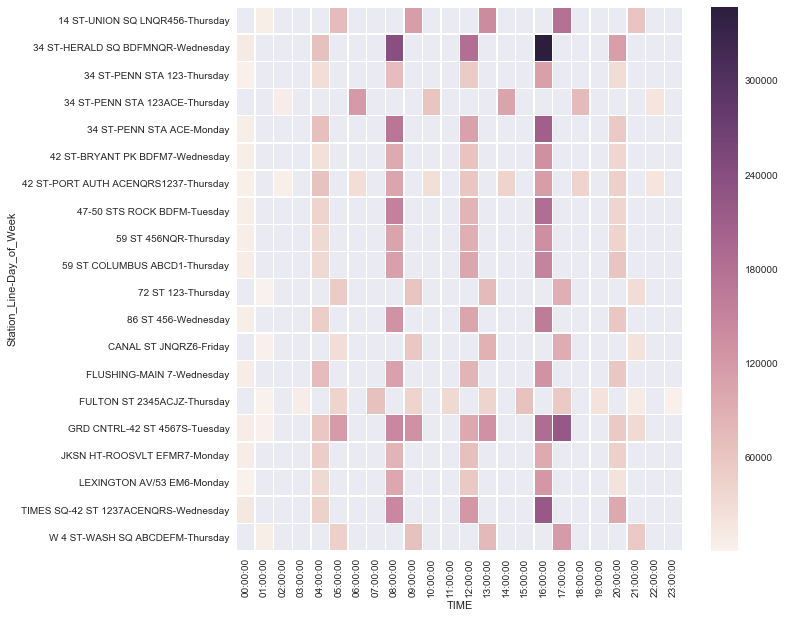

In [48]:
#Plot heatmap for top 20 stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_4hour_station_pivot, linewidth=0.5, ax=ax)

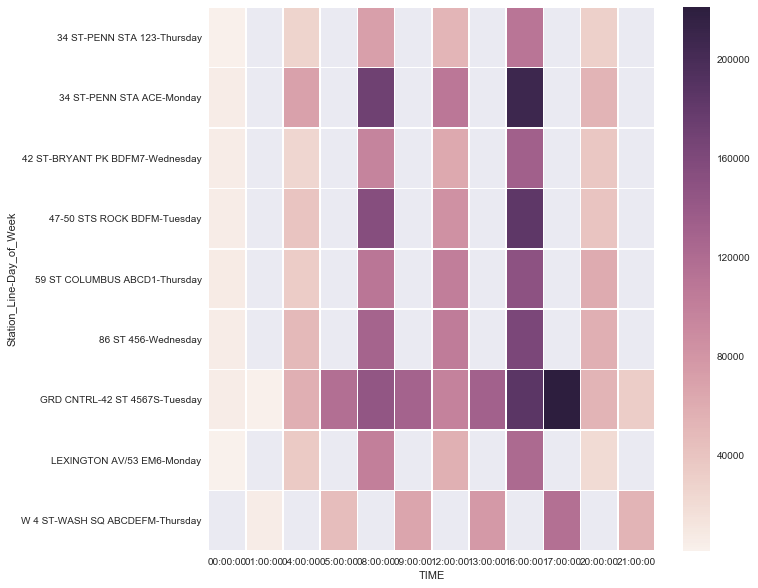

In [49]:
#Refine heatmap to top 10 recommended
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df_4hour_station_pivot_refined, linewidth=0.5, ax=ax)

### Plot the counts for weekdays total

In [50]:
#Create pivot table for top 20 stations
weekday_pivot = df_4hour_station[df_4hour_station['Day_Code']<5]
weekday_pivot = weekday_pivot.groupby(['Station_Line', 'TIME'])['Counts_Hour'].sum().reset_index()
weekday_pivot = weekday_pivot[weekday_pivot['Station_Line'].isin(df_station_total_ranked['Station_Line'])]
weekday_pivot = weekday_pivot.pivot_table(index='Station_Line',
                                                     values='Counts_Hour',
                                                     columns='TIME',
                                                     aggfunc=np.max)
weekday_pivot

TIME,00:00:00,01:00:00,02:00:00,03:00:00,04:00:00,05:00:00,06:00:00,07:00:00,08:00:00,09:00:00,10:00:00,11:00:00,12:00:00,13:00:00,14:00:00,15:00:00,16:00:00,17:00:00,18:00:00,19:00:00,20:00:00,21:00:00,22:00:00,23:00:00
Station_Line,,,,,,,,,,,,,,,,,,,,,,,,
14 ST-UNION SQ LNQR456,NaN,23921.0,NaN,NaN,NaN,359383.0,NaN,NaN,NaN,538945.0,NaN,NaN,NaN,690748.0,NaN,NaN,NaN,878168.0,NaN,NaN,NaN,261350.0,NaN,NaN
34 ST-HERALD SQ BDFMNQR,58534.0,NaN,NaN,NaN,315226.0,NaN,NaN,NaN,1.107e+06,NaN,NaN,NaN,922243.0,NaN,NaN,NaN,1.661e+06,NaN,NaN,NaN,499405.0,NaN,NaN,NaN
34 ST-PENN STA 123,12792.0,NaN,NaN,NaN,139218.0,NaN,NaN,NaN,3.533e+05,NaN,NaN,NaN,258512.0,NaN,NaN,NaN,5.443e+05,NaN,NaN,NaN,130154.0,NaN,NaN,NaN
34 ST-PENN STA 123ACE,NaN,NaN,31426.0,NaN,NaN,NaN,557304.0,NaN,NaN,NaN,285387.0,NaN,NaN,NaN,538778.0,NaN,NaN,NaN,355880.0,NaN,NaN,NaN,85614.0,NaN
34 ST-PENN STA ACE,31732.0,NaN,NaN,NaN,336809.0,NaN,NaN,NaN,7.599e+05,NaN,NaN,NaN,552616.0,NaN,NaN,NaN,9.480e+05,NaN,NaN,NaN,265632.0,NaN,NaN,NaN
42 ST-BRYANT PK BDFM7,24764.0,NaN,NaN,NaN,118091.0,NaN,NaN,NaN,4.776e+05,NaN,NaN,NaN,308908.0,NaN,NaN,NaN,6.194e+05,NaN,NaN,NaN,166933.0,NaN,NaN,NaN
42 ST-PORT AUTH ACENQRS1237,21147.0,NaN,18987.0,NaN,320641.0,NaN,111073.0,NaN,5.049e+05,NaN,107803.0,NaN,290079.0,NaN,186824.0,NaN,5.762e+05,NaN,172195.0,NaN,194587.0,NaN,71026.0,NaN
47-50 STS ROCK BDFM,30047.0,NaN,NaN,NaN,188136.0,NaN,NaN,NaN,7.394e+05,NaN,NaN,NaN,437863.0,NaN,NaN,NaN,8.935e+05,NaN,NaN,NaN,189272.0,NaN,NaN,NaN
59 ST 456NQR,26412.0,NaN,NaN,NaN,168036.0,NaN,NaN,NaN,5.031e+05,NaN,NaN,NaN,421491.0,NaN,NaN,NaN,6.456e+05,NaN,NaN,NaN,187480.0,NaN,NaN,NaN


In [51]:
#Refine pivot table for top 10 stations
weekday_pivot_refined = df_4hour_station[df_4hour_station['Day_Code']<5]
weekday_pivot_refined = weekday_pivot_refined.groupby(['Station_Line', 'TIME'])['Counts_Hour'].sum().reset_index()
weekday_pivot_refined = weekday_pivot_refined[weekday_pivot_refined['Station_Line'].isin(final_stations['Station_Line'])]
weekday_pivot_refined = weekday_pivot_refined.pivot_table(index='Station_Line',
                                                     values='Counts_Hour',
                                                     columns='TIME',
                                                     aggfunc=np.max)
weekday_pivot_refined

TIME,00:00:00,01:00:00,04:00:00,05:00:00,08:00:00,09:00:00,12:00:00,13:00:00,16:00:00,17:00:00,20:00:00,21:00:00
Station_Line,,,,,,,,,,,,
34 ST-PENN STA 123,12792.0,NaN,139218.0,NaN,353322.0,NaN,258512.0,NaN,544283.0,NaN,130154.0,NaN
34 ST-PENN STA ACE,31732.0,NaN,336809.0,NaN,759858.0,NaN,552616.0,NaN,948012.0,NaN,265632.0,NaN
42 ST-BRYANT PK BDFM7,24764.0,NaN,118091.0,NaN,477650.0,NaN,308908.0,NaN,619427.0,NaN,166933.0,NaN
47-50 STS ROCK BDFM,30047.0,NaN,188136.0,NaN,739412.0,NaN,437863.0,NaN,893514.0,NaN,189272.0,NaN
59 ST COLUMBUS ABCD1,31477.0,NaN,167862.0,NaN,524799.0,NaN,493104.0,NaN,723515.0,NaN,269028.0,NaN
86 ST 456,26033.0,NaN,234078.0,NaN,583842.0,NaN,514042.0,NaN,796883.0,NaN,272075.0,NaN
96 ST 123,NaN,14028.0,NaN,265174.0,NaN,232355.0,NaN,293333.0,NaN,354247.0,NaN,158399.0
GRD CNTRL-42 ST 4567S,31823.0,12591.0,280219.0,590214.0,633363.0,683277.0,503799.0,620288.0,896141.0,964557.0,252981.0,205488.0
LEXINGTON AV/53 EM6,14515.0,NaN,147455.0,NaN,486460.0,NaN,275318.0,NaN,527204.0,NaN,146127.0,NaN


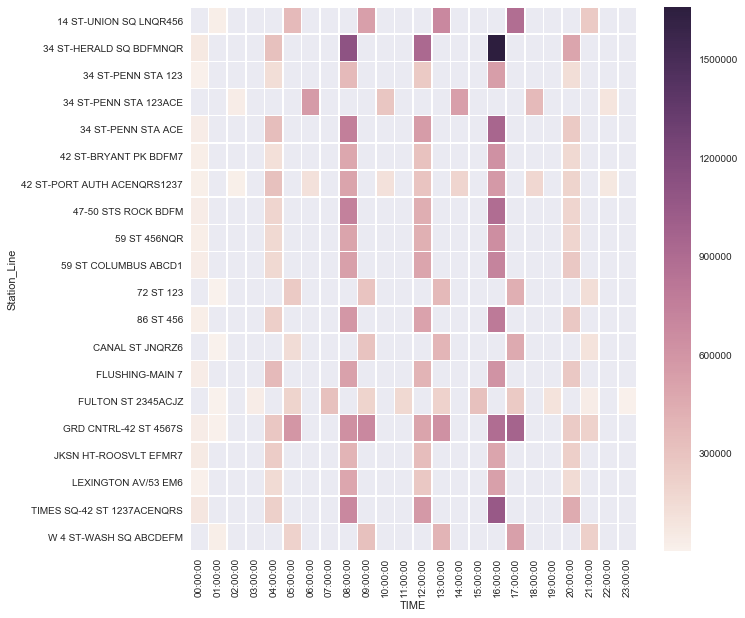

In [52]:
#Plot heatmap for top 20 stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(weekday_pivot, linewidth=0.5, ax=ax)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text xticklabel objects>)

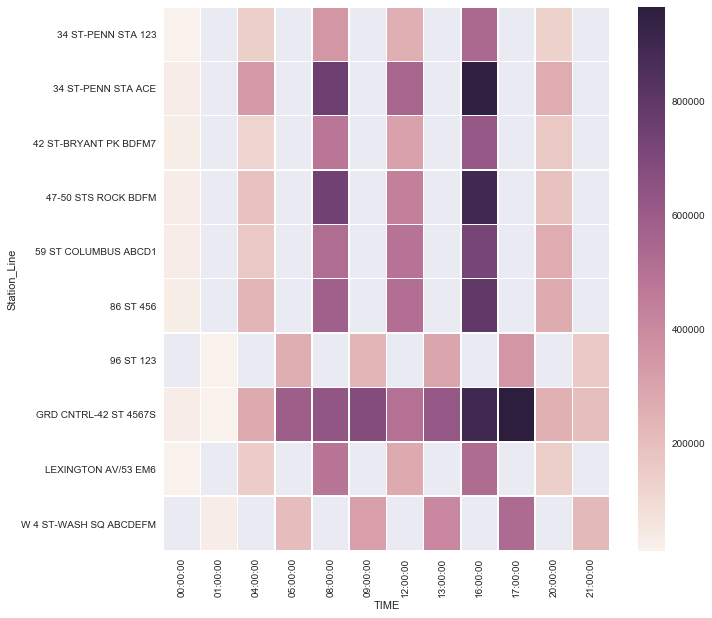

In [53]:
#Refined heatmap for top 10 recommended stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(weekday_pivot_refined, linewidth=0.5, ax=ax)
plt.xticks(rotation=90)

### Plot total counts of all stations

In [54]:
#Create pivot table for top 20 stations
total_pivot = df_4hour_station.copy()
total_pivot = total_pivot[total_pivot['Station_Line'].isin(df_station_total_ranked['Station_Line'])]
total_pivot = total_pivot.groupby(['Day_of_Week', 'TIME'])['Counts_Hour'].sum().reset_index()
total_pivot = total_pivot.pivot_table(index='TIME',
                                                     values='Counts_Hour',
                                                     columns='Day_of_Week',
                                                     aggfunc=np.max)
total_pivot = total_pivot.reindex_axis(column_order, axis=1)
total_pivot

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME,,,,,,,
00:00:00,7.212e+04,9.054e+04,9.455e+04,1.008e+05,1.212e+05,1.579e+05,151489.0
01:00:00,1.250e+04,1.590e+04,1.720e+04,1.858e+04,2.243e+04,3.377e+04,30782.0
02:00:00,9.244e+03,9.512e+03,9.439e+03,1.049e+04,1.173e+04,1.105e+04,10328.0
03:00:00,6.500e+03,6.415e+03,6.724e+03,6.803e+03,6.248e+03,2.194e+03,1347.0
04:00:00,6.601e+05,6.682e+05,6.496e+05,6.537e+05,6.067e+05,2.018e+05,127642.0
05:00:00,3.410e+05,3.576e+05,3.842e+05,3.763e+05,2.998e+05,8.015e+04,51074.0
06:00:00,1.412e+05,1.307e+05,1.414e+05,1.463e+05,1.088e+05,3.363e+04,26665.0
07:00:00,5.419e+04,6.762e+04,6.717e+04,6.690e+04,6.054e+04,1.326e+04,7874.0
08:00:00,1.659e+06,1.694e+06,1.664e+06,1.610e+06,1.651e+06,6.915e+05,532431.0


In [55]:
#Refine pivot table for top 10 recommended
total_pivot_refined = df_4hour_station.copy()
total_pivot_refined = total_pivot_refined[total_pivot_refined['Station_Line'].isin(final_stations['Station_Line'])]
total_pivot_refined = total_pivot_refined.groupby(['Day_of_Week', 'TIME'])['Counts_Hour'].sum().reset_index()
total_pivot_refined = total_pivot_refined.pivot_table(index='TIME',
                                                     values='Counts_Hour',
                                                     columns='Day_of_Week',
                                                     aggfunc=np.max)
total_pivot_refined = total_pivot_refined.reindex_axis(column_order, axis=1)

total_pivot_refined

Day_of_Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
TIME,,,,,,,
00:00:00,2.768e+04,3.880e+04,4.066e+04,4.349e+04,5.254e+04,68459.0,63543.0
01:00:00,7.875e+03,9.755e+03,1.089e+04,1.279e+04,1.340e+04,20422.0,19367.0
04:00:00,3.317e+05,3.420e+05,3.167e+05,3.198e+05,3.017e+05,81982.0,51125.0
05:00:00,2.003e+05,2.122e+05,2.377e+05,2.436e+05,1.699e+05,40932.0,26436.0
08:00:00,9.467e+05,9.675e+05,8.821e+05,8.475e+05,9.149e+05,316467.0,249638.0
09:00:00,2.202e+05,2.345e+05,2.568e+05,3.021e+05,2.226e+05,118017.0,97598.0
12:00:00,6.209e+05,6.592e+05,6.501e+05,6.665e+05,7.475e+05,500590.0,404304.0
13:00:00,2.273e+05,2.584e+05,2.860e+05,2.499e+05,2.958e+05,161225.0,133054.0
16:00:00,1.215e+06,1.201e+06,1.215e+06,1.196e+06,1.122e+06,524828.0,412142.0


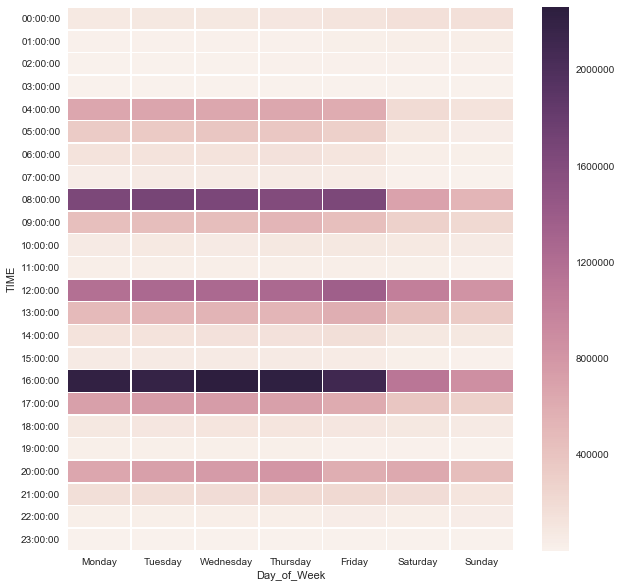

In [56]:
#Plot heatmap for top 20 stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(total_pivot, linewidth=0.5, ax=ax)

(array([  0.5,   1.5,   2.5,   3.5,   4.5,   5.5,   6.5,   7.5,   8.5,
          9.5,  10.5,  11.5]), <a list of 12 Text yticklabel objects>)

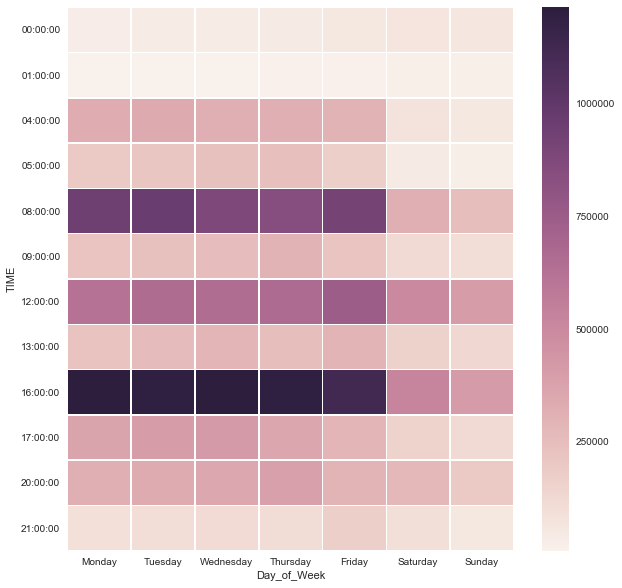

In [57]:
#Refine heatmap for top 10 recommended stations
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(total_pivot_refined, linewidth=0.5, ax=ax)
plt.yticks(rotation=0)

# Next, we will align this data with demographics of interest

In order to increase women tech workers to this gala, the following data must be researched:

- Female population
- People with bachelor degrees or higher
- Employees at tech companies

## Find stations near tech hubs

http://www.digital.nyc/map

Looking at stops near localized hubs:

210 companies at station "Church Av"

## Latitude and Longitude of Stations

We want to be able to analyze stations within a region to target an audience. To do so, we must correlate turnstile data with table of coordinates of different regions close to tech hubs

In [123]:
#Correlate stations in data sets with coordinates of different regions
rbs = pd.read_csv('Remote-Booth-Station2013.csv')
df_coords = pd.merge(df,rbs[['C/A','STOPID']],on='C/A')

In [124]:
#Read GTFS coordinates for the stations
coord = pd.read_csv('http://web.mta.info/developers/data/nyct/subway/Stations.csv')
coord = coord.rename(columns={'GTFS Stop ID': 'STOPID'})
df_coords = pd.merge(df_coords,coord[['STOPID','GTFS Latitude','GTFS Longitude']],on='STOPID')

In [125]:
#Check for NaN to make sure all stations have coordinates
df_coords[['GTFS Latitude','GTFS Longitude']].isnull().values.any()

False

## Silicon Alley

Northwest corner: 40.759721, -73.994992

Southeast corner: 40.735691, -73.975443

In [126]:
#Compile coordinates of stations in Silicon Alley
latitude = [40.735691, 40.759721]
longitude = [-73.994992, -73.975443]
silicon_alley = df_coords.copy()
silicon_alley['Station_Line'] = df_coords['STATION']+' '+df_coords['LINENAME']
silicon_alley = silicon_alley[silicon_alley['GTFS Latitude']>latitude[0]]
silicon_alley = silicon_alley[silicon_alley['GTFS Latitude']<latitude[1]]
silicon_alley = silicon_alley[silicon_alley['GTFS Longitude']>longitude[0]]
silicon_alley = silicon_alley[silicon_alley['GTFS Longitude']<longitude[1]]

silicon_alley.groupby('Station_Line').sum()

,ENTRIES,EXITS,GTFS Latitude,GTFS Longitude
Station_Line,,,,
23 ST 6,524971631706,456700107771,172370.365,-313037.300
23 ST FM,530529867750,556425643066,69670.321,-126527.724
23 ST NR,24819262200,5840958563,96719.853,-175650.703
28 ST 1,5506114074,26621517227,75626.831,-137331.685
28 ST 6,260504345682,337944723262,123288.530,-223876.383
28 ST NR,4503900352,5829962390,61973.896,-112536.799
33 ST 6,58976487427,23541320106,152512.581,-276914.910
34 ST-HERALD SQ BDFMNQR,563482244287,596750042788,388954.617,-706214.983
34 ST-PENN STA 123,22266242177,17788493732,144297.071,-262002.333


In [127]:
#Compile counts of top stations in Silicon Alley
silicon_alley_ranks = df_station_total[df_station_total['Station_Line'].isin(silicon_alley['Station_Line'])].sort_values('Counts', ascending=False)
silicon_alley_ranks

,index,Station_Line,Counts
0,302,GRD CNTRL-42 ST 4567S,6.433e+06
1,86,34 ST-HERALD SQ BDFMNQR,5.526e+06
2,424,TIMES SQ-42 ST 1237ACENQRS,3.872e+06
3,90,34 ST-PENN STA ACE,3.489e+06
5,99,42 ST-PORT AUTH ACENQRS1237,3.242e+06
7,103,47-50 STS ROCK BDFM,2.772e+06
12,89,34 ST-PENN STA 123ACE,2.236e+06
15,97,42 ST-BRYANT PK BDFM7,1.954e+06
19,88,34 ST-PENN STA 123,1.698e+06
29,84,33 ST 6,1.369e+06


## Lower Manhattan

Northwest Corner: 40.730034, -74.017021

Southeast Corner: 40.681435, -73.974389

In [128]:
#Compile coordinates of stations in Lower Manhattan
latitude = [40.681435, 40.730034]
longitude = [-74.017021, -73.974389]
lower_man = df_coords.copy()
lower_man['Station_Line'] = df_coords['STATION']+' '+df_coords['LINENAME']
lower_man = lower_man[lower_man['GTFS Latitude']>latitude[0]]
lower_man = lower_man[lower_man['GTFS Latitude']<latitude[1]]
lower_man = lower_man[lower_man['GTFS Longitude']>longitude[0]]
lower_man = lower_man[lower_man['GTFS Longitude']<longitude[1]]

lower_man.groupby('Station_Line').sum()

,ENTRIES,EXITS,GTFS Latitude,GTFS Longitude
Station_Line,,,,
2 AV F,19846913101,12993510216,68374.592,-124229.106
ATL AV-BARCLAY 2345BDNQR,19977534169,12631542131,153054.939,-278301.060
ATL AV-BARCLAY BDNQR2345,4950539567,5412870550,69894.538,-127095.596
B'WAY-LAFAYETTE BDFQ6,18595234832,15442958261,137162.800,-249219.215
BERGEN ST 23,2619117636,2239860438,55699.333,-101293.490
BLEECKER ST 6DF,4540853732,1697730807,61903.391,-112471.882
BOROUGH HALL 2345R,21471768031,13124323402,154430.766,-280792.042
BOROUGH HALL R2345,18353028282,1223574732,34385.770,-62521.548
BOWERY JZ,2181081986,2264023097,21133.825,-38402.842


In [129]:
#Compile counts of top stations in Lower Manhattan
lower_man_ranks = df_station_total[df_station_total['Station_Line'].isin(lower_man['Station_Line'])]
lower_man_ranks

,index,Station_Line,Counts
14,292,FULTON ST 2345ACJZ,2.104e+06
17,227,CANAL ST JNQRZ6,1.902e+06
24,324,JAY ST-METROTEC ACF,1.552e+06
26,210,BOWLING GREEN 45,1.467e+06
27,206,BOROUGH HALL 2345R,1.392e+06
30,236,CHAMBERS ST ACE23,1.361e+06
31,182,B'WAY-LAFAYETTE BDFQ6,1.361e+06
33,293,FULTON ST ACJZ2345,1.249e+06
36,261,DELANCEY/ESSEX FJMZ,1.215e+06
45,170,ATL AV-BARCLAY BDNQR2345,1.133e+06


# Columbia University

Northwest Corner: 40.823344, -73.971761

Southeast Corner: 40.794110, -73.943077

In [130]:
#Compile coordinates of stations in Columbia University
latitude = [40.794110, 40.823344]
longitude = [-73.971761, -73.943077]
columbia = df_coords.copy()
columbia['Station_Line'] = df_coords['STATION']+' '+df_coords['LINENAME']
columbia = columbia[columbia['GTFS Latitude']>latitude[0]]
columbia = columbia[columbia['GTFS Latitude']<latitude[1]]
columbia = columbia[columbia['GTFS Longitude']>longitude[0]]
columbia = columbia[columbia['GTFS Longitude']<longitude[1]]

columbia.groupby('Station_Line').sum()

,ENTRIES,EXITS,GTFS Latitude,GTFS Longitude
Station_Line,,,,
103 ST 1,9978651655,5110201465,37453.891,-67902.972
103 ST BC,4218289336,3766515047,20438.842,-37054.688
110 ST 6,4589536667,4740321118,41978.076,-76088.633
116 ST 23,5100669585,2448939461,55246.041,-100127.792
116 ST BC,275753143830,340165844272,41131.526,-74546.521
116 ST-COLUMBIA 1,208319296682,44149494393,42113.569,-76330.962
125 ST 1,111427905634,57402682918,34897.322,-63234.408
125 ST 23,626658006510,390685329886,54804.814,-99308.800
125 ST 456,357444513737,153323565839,99426.755,-180162.594


In [131]:
#Compile counts of top stations near Columbia University
columbia_ranks = df_station_total[df_station_total['Station_Line'].isin(columbia['Station_Line'])]
columbia_ranks

,index,Station_Line,Counts
28,19,125 ST ACBD,1.388e+06
37,18,125 ST 456,1.200e+06
98,22,137 ST CITY COL 1,6.799e+05
107,7,110 ST 6,6.436e+05
131,14,116 ST-COLUMBIA 1,5.324e+05
133,231,CATHEDRAL PKWY 1,5.263e+05
146,234,CENTRAL PK N110 23,4.761e+05
154,1,103 ST 1,4.637e+05
157,11,116 ST 23,4.545e+05
180,17,125 ST 23,4.100e+05


## Include demographics to predict the ridership of targeted group at top stations

In [132]:
#Demographics information for each station
#% Female, %Bach, %Grad, %Science
demographics = { '59 ST COLUMBUS ABCD1':(.515,.334,.481,.216),
     'FLUSHING-MAIN 7':(.533, .172,.081,.091),
     'PATH NEW WTC 1': (.524, .207, .143, .129),
     '86 ST 456': (.559, .468, .372, .242),
     'W 4 ST-WASH SQ ABCDEFM': (.503, .448, .39, .25),
     '59 ST 456NQRW': (.469, .148, .078, .099),
     'LEXINGTON AV/53 EM6': (.553, .428, .383, .25),
     '96 ST 123': (.548, .324, .407, .221),
     'JKSN HT-ROOSVLT EFMR7': (.48, .18, .07, .102),
     'FULTON ST 2345ACJZ': (.516, .44, .38, .279),
     'CANAL ST JNQRZ6W': (.501, .426, .326, .254),
     'JAY ST-METROTEC ACF': (.514, .291, .272, .228),
     'BOROUGH HALL 2345R': (.514, .291, .272, .228),
     'B\'WAY-LAFAYETTE BDFQ6': (.503, .436, .333, .245),
     'DELANCEY/ESSEX FJMZ': (.484, .226, .089, .181),
     'WALL ST 23': (.516, .44, .38, .279),
     'BOWLING GREEN 45': (.501, .426, .326, .254),
     'CHAMBERS ST ACE23': (.501, .426, .326, .254),
     'GRD CNTRL-42 ST 4567S': (.553, .428, .383, .25),
     '34 ST-HERALD SQ BDFMNQRW': (.52, .387, .387, .243),
     '34 ST-PENN STA ACE': (.505, .39, .367, .243),
     '42 ST-PORT AUTH ACENQRS1237W': (.49, .379, .336, .235),
     'TIMES SQ-42 ST 1237ACENQRSW': (.52, .387, .387, .243),
     '47-50 STS ROCK BDFM': (.52, .387, .387, .243),
     '34 ST-PENN STA 123ACE': (.513, .389, .377, .243),
     '42 ST-BRYANT PK BDFM7': (.52, .387, .387, .243),
     '34 ST-PENN STA 123': (.52, .387, .387, .243),
     '33 ST 6': (.52, .40, .358, .238),
     '23 ST FM': (.49, .394, .346, .242),
     '23 ST 6': (.523, .422, .342, .245),
     '28 ST 6': (.52, .40, .358, .238)
    }

demographics = pd.DataFrame.from_dict(demographics, orient='index')
demographics = demographics.rename(columns={0:"Female", 1:"Bachelors", 2:"Grad", 3:"Professional"})
demographics['Station_Line']=demographics.index

In [119]:
#Find counts of each demographic based on statistics
new_ranked = pd.merge(df_station_total,demographics,on='Station_Line')
new_ranked['Female_Ct'] = new_ranked['Counts']*new_ranked['Female']
new_ranked['Bachelors_Ct'] = new_ranked['Counts']*new_ranked['Bachelors']
new_ranked['Grad_Ct'] = new_ranked['Counts']*new_ranked['Grad']
new_ranked['Professional_Ct'] = new_ranked['Counts']*new_ranked['Professional']
new_ranked['Educated_Ct'] = new_ranked['Bachelors_Ct']+new_ranked['Grad_Ct']

#Rank stations for each category
prof_ord = new_ranked.sort_values(['Professional_Ct'], ascending=False).index[:20]
grad_ord = new_ranked.sort_values(['Grad_Ct'], ascending=False).index[:20]
fem_ord = new_ranked.sort_values(['Female_Ct'], ascending=False).index[:20]
bach_ord = new_ranked.sort_values(['Bachelors_Ct'], ascending=False).index[:20]

#Find weighted count that includes all demographic of interest
new_ranked['Weighted_all'] = new_ranked['Counts']*new_ranked['Female']* \
    (new_ranked['Bachelors']+new_ranked['Grad'])*new_ranked['Professional']
all_ord = new_ranked.sort_values(['Weighted_all'], ascending=False).index[:20]

In [133]:
#Find the top 10 stations based on weighted rankings
top = new_ranked.iloc[0:10]
new_top = new_ranked.iloc[all_ord[0:10]]
new_ranked['Station_Line'][all_ord[0:10]]

0      GRD CNTRL-42 ST 4567S
2                  86 ST 456
1         34 ST-PENN STA ACE
3        47-50 STS ROCK BDFM
9         FULTON ST 2345ACJZ
5       59 ST COLUMBUS ABCD1
8     W 4 ST-WASH SQ ABCDEFM
7      34 ST-PENN STA 123ACE
11       LEXINGTON AV/53 EM6
10     42 ST-BRYANT PK BDFM7
Name: Station_Line, dtype: object

In [134]:
#Print out the final values compared to the average ridership
print("Total Commuter change:",new_top['Counts'].sum()/top['Counts'].sum())
print("Female change:",new_top['Female_Ct'].sum()/top['Female_Ct'].sum())
print("Female Grad change:",(new_top['Grad_Ct'].sum()/top['Grad_Ct'].sum())*new_top['Female_Ct'].sum()/top['Female_Ct'].sum())
print("Female Bach change:",new_top['Bachelors_Ct'].sum()/top['Bachelors_Ct'].sum()*new_top['Female_Ct'].sum()/top['Female_Ct'].sum())
print("Female Prof change:",new_top['Professional_Ct'].sum()/top['Professional_Ct'].sum()*new_top['Female_Ct'].sum()/top['Female_Ct'].sum())
print("Female Ed change:",new_top['Educated_Ct'].sum()/top['Educated_Ct'].sum()*new_top['Female_Ct'].sum()/top['Female_Ct'].sum())

print("Grad change:",(new_top['Grad_Ct'].sum()/top['Grad_Ct'].sum()))
print("Bach change:",new_top['Bachelors_Ct'].sum()/top['Bachelors_Ct'].sum())
print("Prof change:",new_top['Professional_Ct'].sum()/top['Professional_Ct'].sum())
print("Ed change:",new_top['Educated_Ct'].sum()/top['Educated_Ct'].sum())

Total Commuter change: 0.9557938464621134
Female change: 0.963362883504577
Female Grad change: 1.0626558159790258
Female Bach change: 1.0169763539507668
Female Prof change: 1.0259696910808
Female Ed change: 1.038695234424418
Grad change: 1.103069086607567
Bach change: 1.0556524144371762
Prof change: 1.0649877721554606
Ed change: 1.0781972735401562
